<a href="https://colab.research.google.com/github/gupprachi12/Python/blob/main/Session_1_EDA_Titanic_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Storytelling: Titanic**

Project Objective: To perform a comprehensive, step-by-step exploratory data analysis to understand the key factors that influenced survival on the Titanic. This notebook will serve as a complete guide, covering data loading, cleaning, analysis, feature engineering, and visualization, with theoretical explanations at each stage.

# Step 1: Loading the libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!git clone 'https://github.com/HarshvardhanSingh-13/Datasets.git'

Cloning into 'Datasets'...
remote: Enumerating objects: 327, done.
remote: Counting objects: 100% (85/85), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 327 (delta 20), reused 0 (delta 0), pack-reused 242 (from 1)
Receiving objects: 100% (327/327), 302.68 MiB | 19.78 MiB/s, done.
Resolving deltas: 100% (134/134), done.
Updating files: 100% (241/241), done.


In [3]:
df = pd.read_csv('/content/Datasets/Titanic_Dataset/Titanic-Dataset.csv')

Legend to Interpret:

PassengerId: This column contains the primary key / unique id for each passenger.

Survived: This column contains information about whether a passenger survived the sinking or not.
The value 0 indicates that the passenger did not survive, while the value 1 indicates deceased.

Pclass: This column contains information about the passenger’s class.
The value 1 indicates first class, the value 2 indicates second class, and the value 3 indicates third class.

Name: This column contains the name of the passenger.

Sex: This column contains information about the passenger’s gender.

Age: This column contains the age of the passenger.

SibSp: This column contains information about the passenger’s siblings and spouse.

Parch: This column contains information about the passenger’s parents and children.

Ticket: This column contains the ticket number of the passenger.

Fare: This column contains the fare paid by the passenger.

Cabin: This column contains the cabin number of the passenger.

Embarked: This column contains information about the port of embarkation. The value C indicates Cherbourg, the value Q indicates Queenstown, and the value S indicates Southampton



# Step 2: Exploring the data

In [4]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [5]:
df.tail()

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

In [6]:
df.shape

(891, 12)

In [7]:
# There are 891 records and 12 features

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Interpretation:

Age, Cabin, and Embarked has missing data

Age and Fare have data in decimals.
Other features/attributes has the data in integers and strings

In [9]:
df[['Survived', 'Age', 'Fare', 'SibSp', 'Parch']].describe()

Survived         Age        Fare       SibSp       Parch
count  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838   29.699118   32.204208    0.523008    0.381594
std      0.486592   14.526497   49.693429    1.102743    0.806057
min      0.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000   20.125000    7.910400    0.000000    0.000000
50%      0.000000   28.000000   14.454200    0.000000    0.000000
75%      1.000000   38.000000   31.000000    1.000000    0.000000
max      1.000000   80.000000  512.329200    8.000000    6.000000

In [10]:
np.median(df['Fare'])

np.float64(14.4542)

Interpretation:


1. Nearly 4 in 10 (38%) people survived in the accident
2. Usually youngsters were present in Ship, as average (mean) age is 29
3. Usually lower income people were present as the average fare is 32 and the highest fare is 512. But as the median is lower than mean it shows that there are majority of the people in the left side of the graph - hence the data is right-skewed




# Step 3. Handling missing values in rows

In [11]:
# Earlier we noticed that Cabin, Embarked and Age has missing values - we will first handle these and then the outliers.
# As NaNs will cause problem will exploring the data's statistics

In [12]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
# Cabin seems to be linked with first class passengers

In [14]:
df['Pclass'][df['Cabin'].isna()].unique()

array([3, 2, 1])

In [15]:
# Missing values in cabin does not show that person is from 2 and 3 Pclass
# But to double check we will apply the following conditions

In [16]:
df[['Pclass', 'Cabin']][(df['Pclass'] == 1) & (df['Cabin'].isna())]

Pclass Cabin
30        1   NaN
34        1   NaN
35        1   NaN
64        1   NaN
83        1   NaN
155       1   NaN
168       1   NaN
187       1   NaN
256       1   NaN
258       1   NaN
270       1   NaN
290       1   NaN
295       1   NaN
306       1   NaN
334       1   NaN
373       1   NaN
375       1   NaN
380       1   NaN
383       1   NaN
447       1   NaN
467       1   NaN
493       1   NaN
507       1   NaN
513       1   NaN
537       1   NaN
545       1   NaN
555       1   NaN
557       1   NaN
602       1   NaN
604       1   NaN
607       1   NaN
633       1   NaN
660       1   NaN
694       1   NaN
708       1   NaN
766       1   NaN
793       1   NaN
822       1   NaN
842       1   NaN
856       1   NaN

In [17]:
df[(df['Pclass'] == 1) & (df['Cabin'].isna())].shape

(40, 12)

In [18]:
# there are 40 records where first class passengers were not having any cabins. We will leave the missing data in Cabin for now.

In [19]:
df[df['Age'].isna()]

PassengerId  Survived  Pclass                                      Name  \
5              6         0       3                          Moran, Mr. James   
17            18         1       2              Williams, Mr. Charles Eugene   
19            20         1       3                   Masselmani, Mrs. Fatima   
26            27         0       3                   Emir, Mr. Farred Chehab   
28            29         1       3             O'Dwyer, Miss. Ellen "Nellie"   
..           ...       ...     ...                                       ...   
859          860         0       3                          Razi, Mr. Raihed   
863          864         0       3         Sage, Miss. Dorothy Edith "Dolly"   
868          869         0       3               van Melkebeke, Mr. Philemon   
878          879         0       3                        Laleff, Mr. Kristo   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   

        Sex  Age  SibSp  Parch      Ticket     Fare Cabin Embarked  
5      male  NaN      0      0      330877   8.4583   NaN        Q  
17     male  NaN      0      0      244373  13.0000   NaN        S  
19   female  NaN      0      0        2649   7.2250   NaN        C  
26     male  NaN      0      0        2631   7.2250   NaN        C  
28   female  NaN      0      0      330959   7.8792   NaN        Q  
..      ...  ...    ...    ...         ...      ...   ...      ...  
859    male  NaN      0      0        2629   7.2292   NaN        C  
863  female  NaN      8      2    CA. 2343  69.5500   NaN        S  
868    male  NaN      0      0      345777   9.5000   NaN        S  
878    male  NaN      0      0      349217   7.8958   NaN        S  
888  female  NaN      1      2  W./C. 6607  23.4500   NaN        S  

[177 rows x 12 columns]

In [20]:
#there is no pattern when the age is missing.
#Age is a numerical column so we can replace it with Median. Median is not impacted with outliers alike mean, so we will use median

In [21]:
df['Age'].median()

28.0

In [22]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [23]:
df['Age'].isna().sum()

np.int64(0)

In [24]:
#hence there is no missing data in age, now

In [25]:
df[df['Embarked'].isna()]

PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN

In [26]:
#there are just two values so can't form any pattern.
# it is a categorical data so we will replace the missing values by mode

In [27]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [28]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [29]:
df[df['Embarked'].isna()]

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []

In [30]:
# hence there is no missing data in Embark, now

In [31]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [32]:
# It shows all the missing fields are treated except Cabin

# Step 4: Better naming

In [33]:
# sibsp and parch is difficult to identify what they actually represent - so just renaming them for sanity

In [34]:
df.columns = df.columns.str.lower() # this will convert all the column names in lower case for ease

In [35]:
df = df.rename( columns= {'sibsp': 'siblings and parents', 'parch':'partner and child'})

In [36]:
df.head(1)

passengerid  survived  pclass                     name   sex   age  \
0            1         0       3  Braund, Mr. Owen Harris  male  22.0   

   siblings and parents  partner and child     ticket  fare cabin embarked  
0                     1                  0  A/5 21171  7.25   NaN        S

# Step 5. Feature engineering

In [37]:
# Now let us have some columns like family size, cabin allotment status, companion status

In [38]:
df['family size'] = df['siblings and parents'] + df['partner and child'] + 1 # siblings + parents + partner + child + the person himself

In [39]:
df.head()

passengerid  survived  pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                name     sex   age  \
0                            Braund, Mr. Owen Harris    male  22.0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
2                             Heikkinen, Miss. Laina  female  26.0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
4                           Allen, Mr. William Henry    male  35.0   

   siblings and parents  partner and child            ticket     fare cabin  \
0                     1                  0         A/5 21171   7.2500   NaN   
1                     1                  0          PC 17599  71.2833   C85   
2                     0                  0  STON/O2. 3101282   7.9250   NaN   
3                     1                  0            113803  53.1000  C123   
4                     0                  0            373450   8.0500   NaN   

  embarked  family size  
0        S            2  
1        C            2  
2        S            1  
3        S            2  
4        S            1

In [40]:
df['cabin status'] = df['cabin'].notna().astype(int)

# not na / has cabin = 1, na / does not has cabin = 0

In [41]:
df

passengerid  survived  pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  name     sex   age  \
0                              Braund, Mr. Owen Harris    male  22.0   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
2                               Heikkinen, Miss. Laina  female  26.0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
4                             Allen, Mr. William Henry    male  35.0   
..                                                 ...     ...   ...   
886                              Montvila, Rev. Juozas    male  27.0   
887                       Graham, Miss. Margaret Edith  female  19.0   
888           Johnston, Miss. Catherine Helen "Carrie"  female  28.0   
889                              Behr, Mr. Karl Howell    male  26.0   
890                                Dooley, Mr. Patrick    male  32.0   

     siblings and parents  partner and child            ticket     fare cabin  \
0                       1                  0         A/5 21171   7.2500   NaN   
1                       1                  0          PC 17599  71.2833   C85   
2                       0                  0  STON/O2. 3101282   7.9250   NaN   
3                       1                  0            113803  53.1000  C123   
4                       0                  0            373450   8.0500   NaN   
..                    ...                ...               ...      ...   ...   
886                     0                  0            211536  13.0000   NaN   
887                     0                  0            112053  30.0000   B42   
888                     1                  2        W./C. 6607  23.4500   NaN   
889                     0                  0            111369  30.0000  C148   
890                     0                  0            370376   7.7500   NaN   

    embarked  family size  cabin status  
0          S            2             0  
1          C            2             1  
2          S            1             0  
3          S            2             1  
4          S            1             0  
..       ...          ...           ...  
886        S            1             0  
887        S            1             1  
888        S            4             0  
889        C            1             1  
890        Q            1             0  

[891 rows x 14 columns]

In [42]:
# now we do not need which cabin name was allocated, so column name "Cabin status" is sufficient.
# hence we will drop the column "cabin"

df.drop('cabin', axis = 1)

passengerid  survived  pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  name     sex   age  \
0                              Braund, Mr. Owen Harris    male  22.0   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
2                               Heikkinen, Miss. Laina  female  26.0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
4                             Allen, Mr. William Henry    male  35.0   
..                                                 ...     ...   ...   
886                              Montvila, Rev. Juozas    male  27.0   
887                       Graham, Miss. Margaret Edith  female  19.0   
888           Johnston, Miss. Catherine Helen "Carrie"  female  28.0   
889                              Behr, Mr. Karl Howell    male  26.0   
890                                Dooley, Mr. Patrick    male  32.0   

     siblings and parents  partner and child            ticket     fare  \
0                       1                  0         A/5 21171   7.2500   
1                       1                  0          PC 17599  71.2833   
2                       0                  0  STON/O2. 3101282   7.9250   
3                       1                  0            113803  53.1000   
4                       0                  0            373450   8.0500   
..                    ...                ...               ...      ...   
886                     0                  0            211536  13.0000   
887                     0                  0            112053  30.0000   
888                     1                  2        W./C. 6607  23.4500   
889                     0                  0            111369  30.0000   
890                     0                  0            370376   7.7500   

    embarked  family size  cabin status  
0          S            2             0  
1          C            2             1  
2          S            1             0  
3          S            2             1  
4          S            1             0  
..       ...          ...           ...  
886        S            1             0  
887        S            1             1  
888        S            4             0  
889        C            1             1  
890        Q            1             0  

[891 rows x 13 columns]

In [43]:
df = df.drop('cabin', axis = 1) #assigning the trimmed dataset to the main dataset

In [44]:
df.isna().sum() # ensuring there is no missing values

passengerid             0
survived                0
pclass                  0
name                    0
sex                     0
age                     0
siblings and parents    0
partner and child       0
ticket                  0
fare                    0
embarked                0
family size             0
cabin status            0
dtype: int64

# Step 6: Univariate Analysis to see outliers

We analyze each variable individually to understand its distribution.

- we can keep the outliers
- We can remove the outliers
- We can cap the outliers to make the data less sckewed


**Theoretical Concept: Univariate Analysis**

This is the simplest form of data analysis, where the data being analyzed contains only one variable. The main purpose is to describe the data and find patterns within it.
- **For Categorical Variables:** We use frequency tables, bar charts (`countplot`), or pie charts to see the count or proportion of each category.
- **For Numerical Variables:** We use histograms (`histplot`) or kernel density plots (`kdeplot`) to understand the distribution, and box plots (`boxplot`) to identify the central tendency, spread, and outliers.

array([[<Axes: title={'center': 'passengerid'}>,
        <Axes: title={'center': 'survived'}>,
        <Axes: title={'center': 'pclass'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'siblings and parents'}>,
        <Axes: title={'center': 'partner and child'}>],
       [<Axes: title={'center': 'fare'}>,
        <Axes: title={'center': 'family size'}>,
        <Axes: title={'center': 'cabin status'}>]], dtype=object)

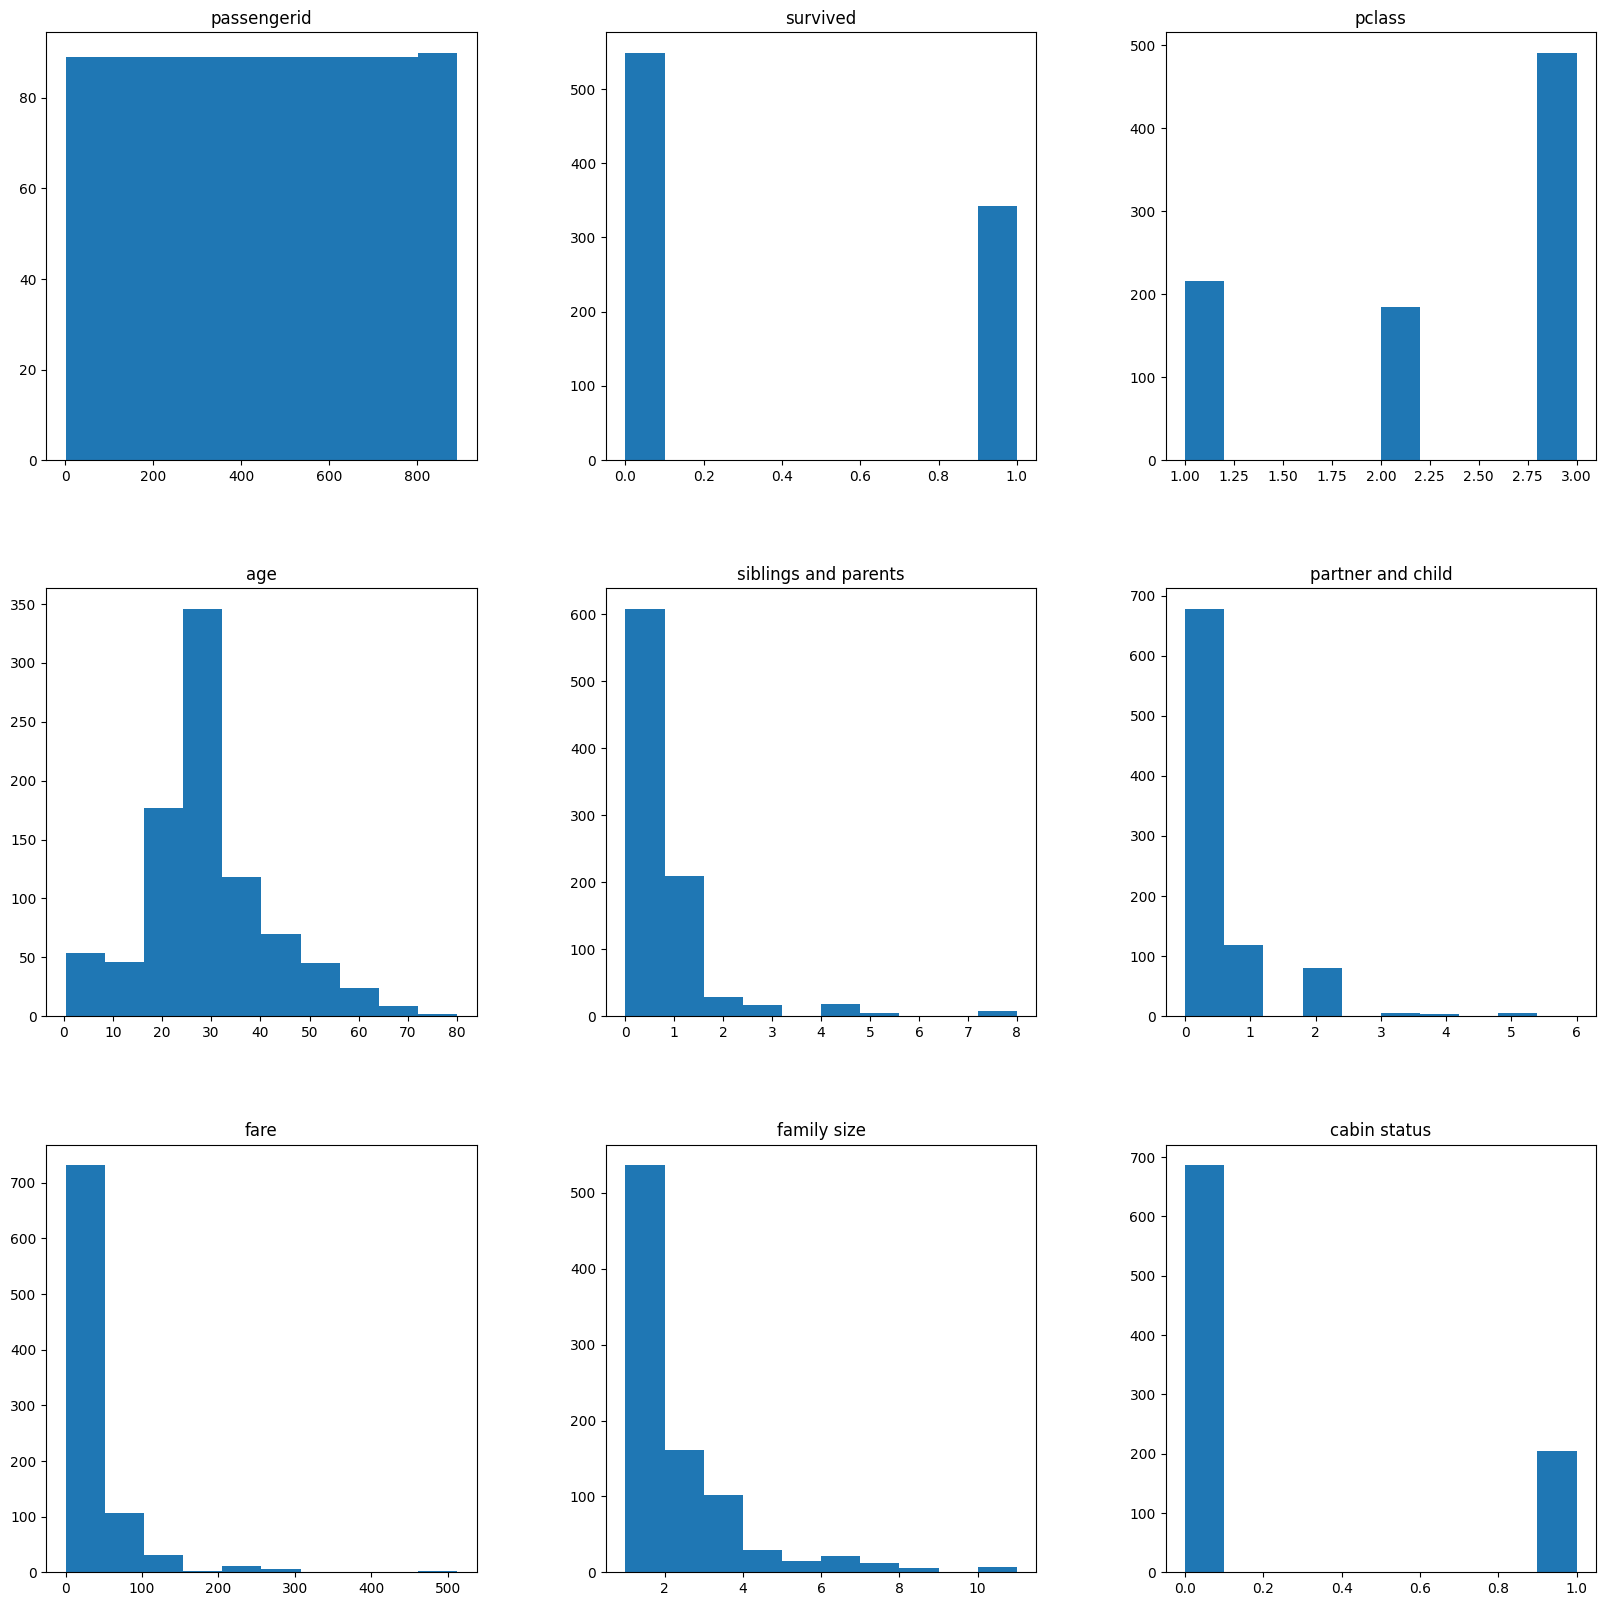

In [45]:
df.hist(figsize=(20,20), grid= False)

# it is referring to pandas, and pandas is building the histogram on the basis of matplot.
# It is used when we want to quick EDA - the charts are not that much appealing. They need a lot of customization

# that is why Seaborn is referred. - Charts are dashboard ready.


In [46]:
# it has given us for all numerical columns, though there are some categorical columns (having binary variables) like cabin status, survived, pclass - we do not need to interpert them
# Passenger Id - is primary key, we do not need to interpret that

In [47]:
df[['fare', 'pclass']].sort_values(['pclass', 'fare'])

fare  pclass
263   0.00       1
633   0.00       1
806   0.00       1
815   0.00       1
822   0.00       1
..     ...     ...
201  69.55       3
324  69.55       3
792  69.55       3
846  69.55       3
863  69.55       3

[891 rows x 2 columns]

In [48]:
df[['fare', 'pclass']][df['pclass'] == 1].sort_values('fare')

fare  pclass
263    0.0000       1
806    0.0000       1
822    0.0000       1
633    0.0000       1
815    0.0000       1
..        ...     ...
341  263.0000       1
438  263.0000       1
258  512.3292       1
737  512.3292       1
679  512.3292       1

[216 rows x 2 columns]

In [49]:
# this shows that fare was not fixed as per the passengers' class

In [50]:
df['fare'].sort_values(ascending = False).head(10)

679    512.3292
258    512.3292
737    512.3292
88     263.0000
438    263.0000
341    263.0000
27     263.0000
742    262.3750
311    262.3750
299    247.5208
Name: fare, dtype: float64

In [51]:
# so there are only a 3 people who paid approximately 500.
# 3 values out of 891 records i.e. less than 1%, so their will be no harm if we remove these records. But I will keep them for now, as it may show that these people have booked very late or there are some other factors


In [52]:
df.loc[df['fare'] > 500]


passengerid  survived  pclass                                name  \
258          259         1       1                    Ward, Miss. Anna   
679          680         1       1  Cardeza, Mr. Thomas Drake Martinez   
737          738         1       1              Lesurer, Mr. Gustave J   

        sex   age  siblings and parents  partner and child    ticket  \
258  female  35.0                     0                  0  PC 17755   
679    male  36.0                     0                  1  PC 17755   
737    male  35.0                     0                  0  PC 17755   

         fare embarked  family size  cabin status  
258  512.3292        C            1             0  
679  512.3292        C            2             1  
737  512.3292        C            1             1

In [53]:
df.drop(df[df['fare'] > 500].index, axis = 0)

passengerid  survived  pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  name     sex   age  \
0                              Braund, Mr. Owen Harris    male  22.0   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
2                               Heikkinen, Miss. Laina  female  26.0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
4                             Allen, Mr. William Henry    male  35.0   
..                                                 ...     ...   ...   
886                              Montvila, Rev. Juozas    male  27.0   
887                       Graham, Miss. Margaret Edith  female  19.0   
888           Johnston, Miss. Catherine Helen "Carrie"  female  28.0   
889                              Behr, Mr. Karl Howell    male  26.0   
890                                Dooley, Mr. Patrick    male  32.0   

     siblings and parents  partner and child            ticket     fare  \
0                       1                  0         A/5 21171   7.2500   
1                       1                  0          PC 17599  71.2833   
2                       0                  0  STON/O2. 3101282   7.9250   
3                       1                  0            113803  53.1000   
4                       0                  0            373450   8.0500   
..                    ...                ...               ...      ...   
886                     0                  0            211536  13.0000   
887                     0                  0            112053  30.0000   
888                     1                  2        W./C. 6607  23.4500   
889                     0                  0            111369  30.0000   
890                     0                  0            370376   7.7500   

    embarked  family size  cabin status  
0          S            2             0  
1          C            2             1  
2          S            1             0  
3          S            2             1  
4          S            1             0  
..       ...          ...           ...  
886        S            1             0  
887        S            1             1  
888        S            4             0  
889        C            1             1  
890        Q            1             0  

[888 rows x 13 columns]

In [54]:
df.head()

passengerid  survived  pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                name     sex   age  \
0                            Braund, Mr. Owen Harris    male  22.0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
2                             Heikkinen, Miss. Laina  female  26.0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
4                           Allen, Mr. William Henry    male  35.0   

   siblings and parents  partner and child            ticket     fare  \
0                     1                  0         A/5 21171   7.2500   
1                     1                  0          PC 17599  71.2833   
2                     0                  0  STON/O2. 3101282   7.9250   
3                     1                  0            113803  53.1000   
4                     0                  0            373450   8.0500   

  embarked  family size  cabin status  
0        S            2             0  
1        C            2             1  
2        S            1             0  
3        S            2             1  
4        S            1             0

In [55]:
df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age',
       'siblings and parents', 'partner and child', 'ticket', 'fare',
       'embarked', 'family size', 'cabin status'],
      dtype='object')

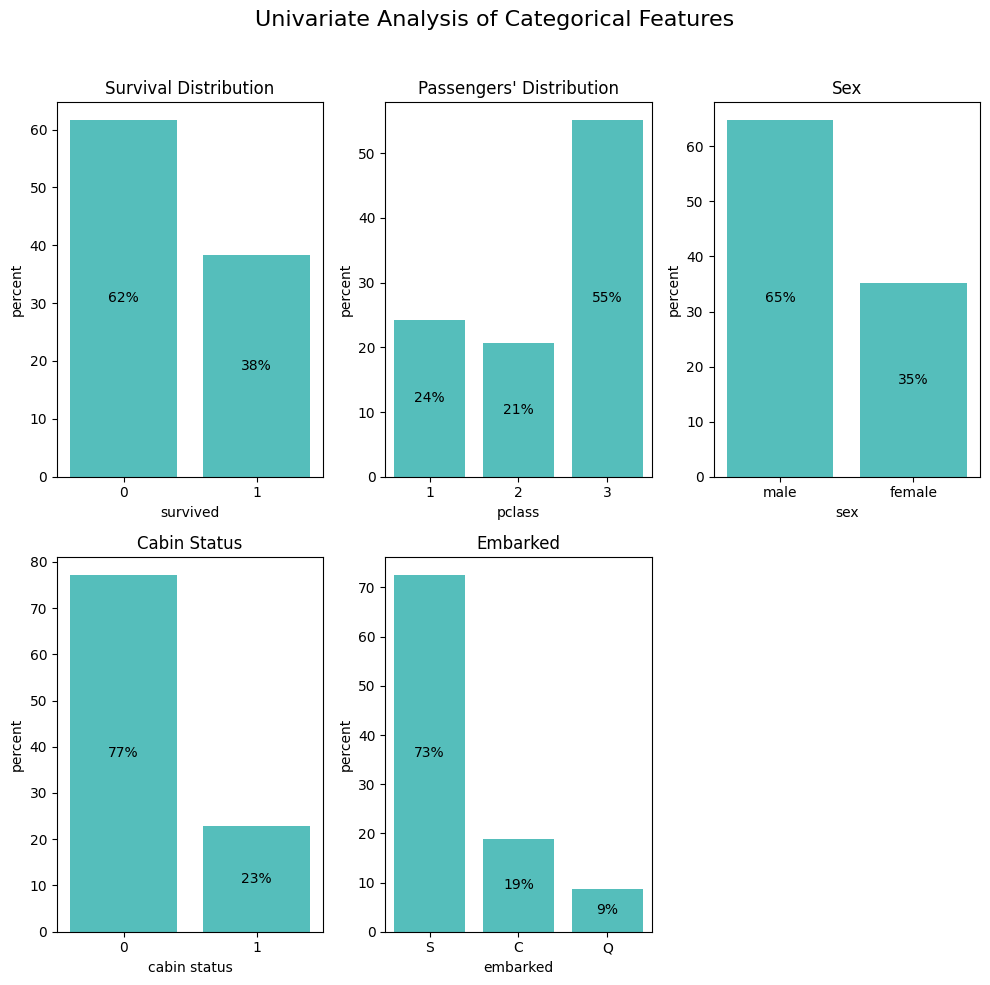

In [56]:
fig, axes = plt.subplots(2, 3, figsize=(10, 10)) # Grid - 2 rows, 3 columns
fig.suptitle('Univariate Analysis of Categorical Features', fontsize=16)

# Plotting each categorical feature
survived = sns.countplot(ax=axes[0, 0], data=df, x='survived', color= '#44CFCB', stat= 'percent')
survived.set_title('Survival Distribution')
survived.bar_label(survived.containers[0], label_type='center', fmt='%.0f%%')

ax_pclass = sns.countplot(ax=axes[0, 1], data=df, x='pclass', color= '#44CFCB', stat= 'percent')
ax_pclass.set_title('Passengers\' Distribution')
ax_pclass.bar_label(ax_pclass.containers[0], label_type='center', fmt='%.0f%%')

sex = sns.countplot(ax=axes[0, 2], data=df, x='sex', color= '#44CFCB', stat= 'percent')
sex.set_title('Sex')
sex.bar_label(sex.containers[0], label_type='center', fmt='%.0f%%')

cabinstatus = sns.countplot(ax=axes[1, 0], data=df, x='cabin status', color= '#44CFCB', stat= 'percent')
cabinstatus.set_title('Cabin Status')
cabinstatus.bar_label(cabinstatus.containers[0], label_type='center', fmt='%.0f%%')

embarked = sns.countplot(ax=axes[1, 1], data=df, x='embarked', color= '#44CFCB', stat= 'percent')
embarked.set_title('Embarked')
embarked.bar_label(embarked.containers[0], label_type='center', fmt='%.0f%%')

axes[1, 2].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Key Insights:

Related to Categorical data -



*   Survival: Most passengers (over 60%) did not survive.
*   Pclass: The 3rd class was the most populated, followed by 1st and then 2nd.
*   Nearly 2 in 3 people were men (65%)
*   7 of 9 peopel were not having the cabin (77%)
*   Most of the people boarded the ship at Southampton (S)









In [57]:
df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age',
       'siblings and parents', 'partner and child', 'ticket', 'fare',
       'embarked', 'family size', 'cabin status'],
      dtype='object')

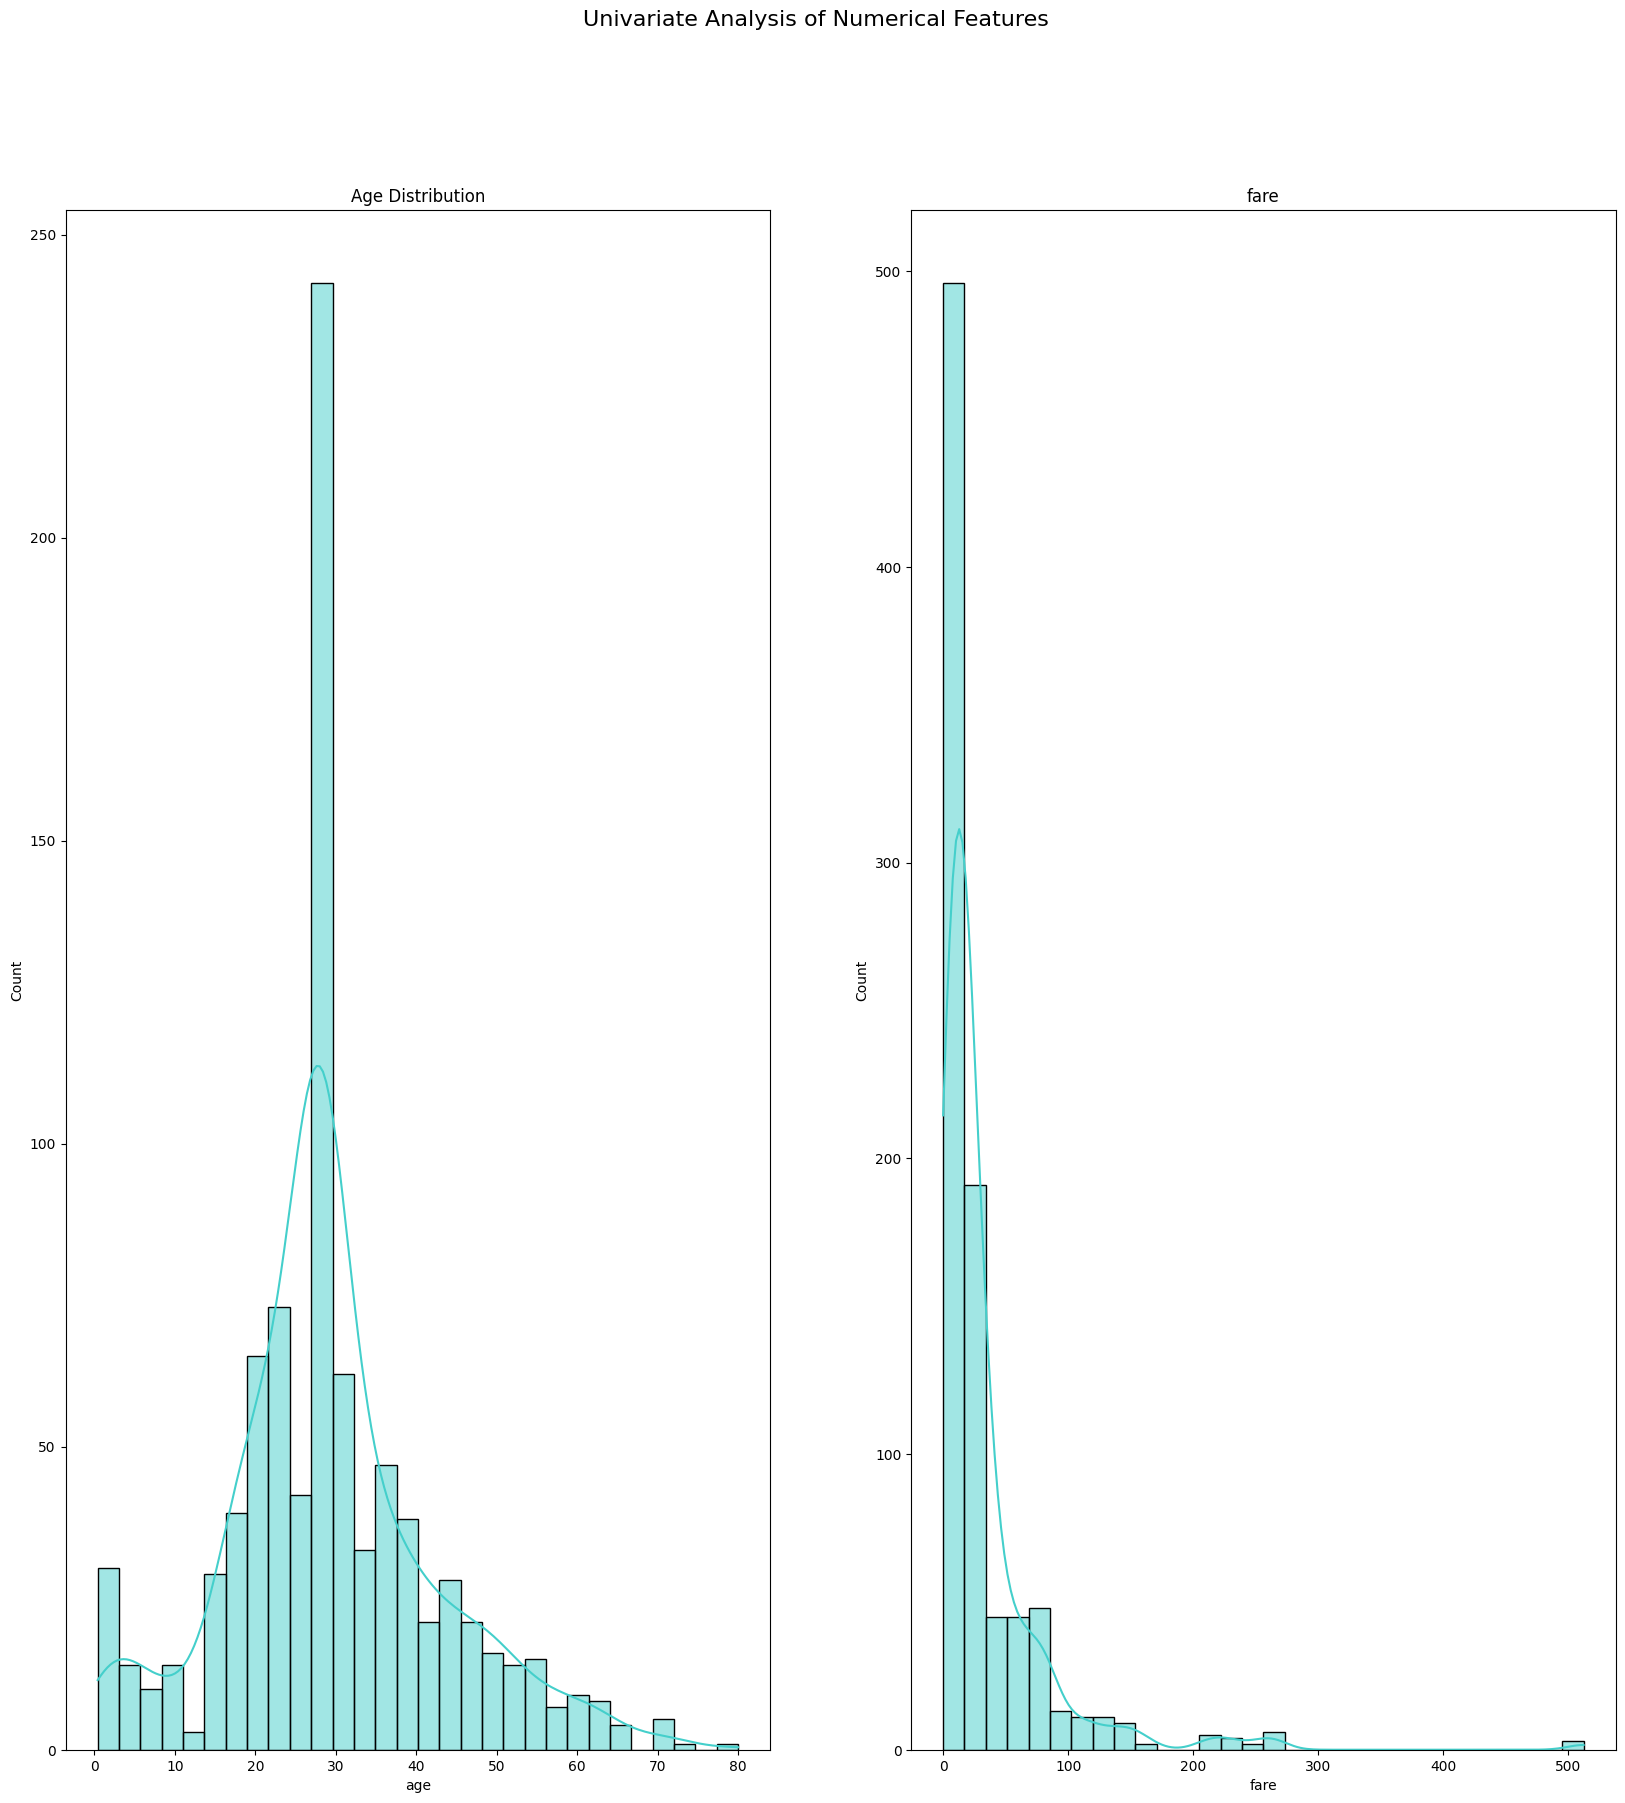

In [58]:
fig, axes = plt.subplots(1, 2, figsize = (20, 20))
fig.suptitle('Univariate Analysis of Numerical Features', fontsize=16)

age = sns.histplot(ax=axes[0], data=df, x='age', kde=True, bins=30 , color= '#44CFCB').set_title('Age Distribution')

fare = sns.histplot(ax=axes[ 1], data=df, x='fare', kde=True, bins=30, color= '#44CFCB').set_title('fare')

plt.show()

Key Insights:

Age: The distribution peaks around the 20-30 age range.

Fare: The distribution is mainly concentrated towards less than 20. So the distribution is right-skewed.

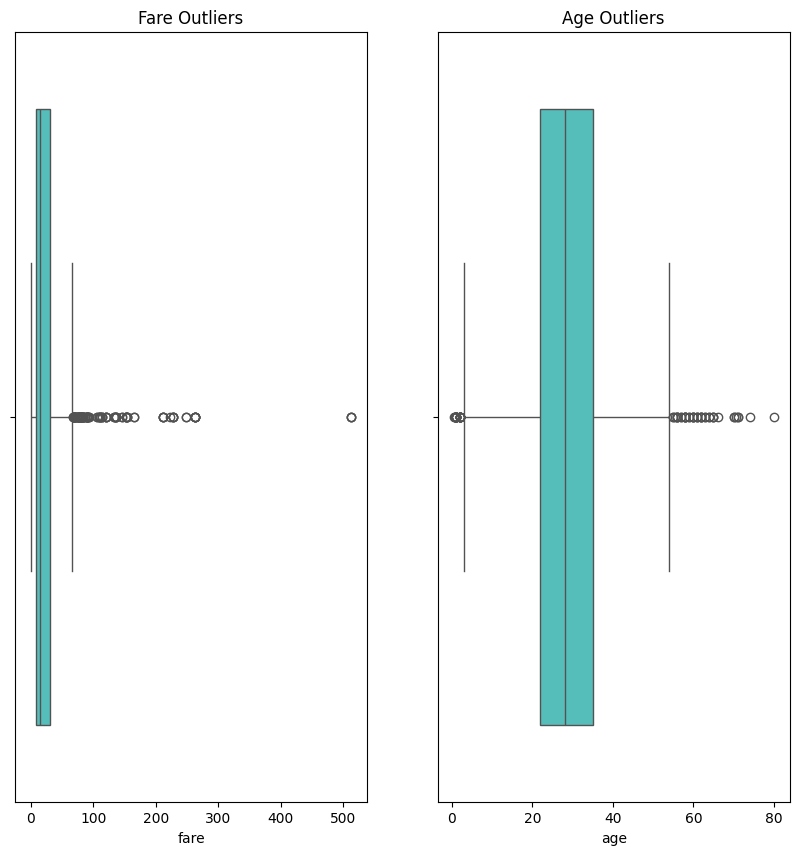

In [59]:
fig, axes = plt.subplots(1,2, figsize = (10,10))
fare = sns.boxplot(ax= axes[0], data = df, x = 'fare',  color= '#44CFCB').set_title('Fare Outliers')
age = sns.boxplot(ax= axes[1], data = df, x = 'age',  color= '#44CFCB').set_title('Age Outliers')
plt.show()

In [63]:
Q1_fare,  Q2_fare, Q3_fare,= df['fare'].quantile([0.25, 0.5, 0.75])
print('Q1_fare', Q1_fare)
print('Q2_fare/median', Q2_fare)
print('Q3_fare', Q3_fare)

IQR_fare = Q3_fare - Q1_fare
print('IQR_fare', IQR_fare)

#outlier stats
outlier_above_fare = (1.5*IQR_fare) + Q3_fare
outlier_below_fare = (1.5*IQR_fare) - Q1_fare
print('outlier_above_fare', outlier_above_fare)
print('outlier_below_fare', outlier_below_fare)

Q1_fare 7.9104
Q2_fare/median 14.4542
Q3_fare 31.0
IQR_fare 23.0896
outlier_above_fare 65.6344
outlier_below_fare 26.724


In [62]:
Q1_age,  Q2_age, Q3_age,= df['age'].quantile([0.25, 0.5, 0.75])
print('Q1_age', Q1_age)
print('Q2_age/median', Q2_age)
print('Q3_age', Q3_age)

IQR_age = Q3_age - Q1_age
print('IQR_age', IQR_age)

#outlier stats
outlier_above_age = (1.5*IQR_age) + Q3_age
outlier_below_age = (1.5*IQR_age) - Q1_age
print('outlier_above_age', outlier_above_age)
print('outlier_below_age', outlier_below_age)

Q1_age 22.0
Q2_age/median 28.0
Q3_age 35.0
IQR_age 13.0
outlier_above_age 54.5
outlier_below_age -2.5


In [72]:
df.loc[~((df['age'] < Q3_age) & (df['age'] > Q1_age) & (df['fare'] < Q3_fare) & (df['fare'] > Q1_fare)) ]

passengerid  survived  pclass  \
0              1         0       3   
1              2         1       1   
3              4         1       1   
4              5         0       3   
6              7         0       1   
..           ...       ...     ...   
882          883         0       3   
884          885         0       3   
885          886         0       3   
887          888         1       1   
890          891         0       3   

                                                  name     sex   age  \
0                              Braund, Mr. Owen Harris    male  22.0   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
4                             Allen, Mr. William Henry    male  35.0   
6                              McCarthy, Mr. Timothy J    male  54.0   
..                                                 ...     ...   ...   
882                       Dahlberg, Miss. Gerda Ulrika  female  22.0   
884                             Sutehall, Mr. Henry Jr    male  25.0   
885               Rice, Mrs. William (Margaret Norton)  female  39.0   
887                       Graham, Miss. Margaret Edith  female  19.0   
890                                Dooley, Mr. Patrick    male  32.0   

     siblings and parents  partner and child           ticket     fare  \
0                       1                  0        A/5 21171   7.2500   
1                       1                  0         PC 17599  71.2833   
3                       1                  0           113803  53.1000   
4                       0                  0           373450   8.0500   
6                       0                  0            17463  51.8625   
..                    ...                ...              ...      ...   
882                     0                  0             7552  10.5167   
884                     0                  0  SOTON/OQ 392076   7.0500   
885                     0                  5           382652  29.1250   
887                     0                  0           112053  30.0000   
890                     0                  0           370376   7.7500   

    embarked  family size  cabin status  
0          S            2             0  
1          C            2             1  
3          S            2             1  
4          S            1             0  
6          S            1             1  
..       ...          ...           ...  
882        S            1             0  
884        S            1             0  
885        Q            6             0  
887        S            1             1  
890        Q            1             0  

[679 rows x 13 columns]

In [ ]:
# we have nearly a three-fourth of the dataset with outliers
# Age: I would like to keep the outliers in age to see the diversity of passengers.
# Fare:Earlier while exploring 500 (fare), we have noticed that fare was not only dependent on Pclass. So, I will keep it too.

# Step 7: Bivariate Analysis

Here, we explore the relationship between two variables. Our primary focus will be on how each feature relates (independent variable) to our target variable (dependent variable), `Survived`.

Theoretical Concept: Bivariate Analysis
This type of analysis involves two different variables, and its main purpose is to find relationships between them.

Categorical vs. Numerical: To compare a numerical variable across different categories, we often use bar plots (barplot) that show the mean (or another estimator) of the numerical variable for each category. We can also use box plots or violin plots.

Categorical vs. Categorical: We can use stacked bar charts or contingency tables (crosstabs).

Numerical vs. Numerical: A scatter plot is the standard choice, with a correlation matrix being used to quantify the relationship.

In [73]:
df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age',
       'siblings and parents', 'partner and child', 'ticket', 'fare',
       'embarked', 'family size', 'cabin status'],
      dtype='object')

In [106]:
df['title'] = df['name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age',
       'siblings and parents', 'partner and child', 'ticket', 'fare',
       'embarked', 'family size', 'cabin status', 'title'],
      dtype='object')

In [113]:
df['title'].value_counts()

title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

In [114]:
# replace is used for data field
# rename is used for labels
df['title'] = df['title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['title'] = df['title'].replace('Mlle', 'Miss')
df['title'] = df['title'].replace('Ms', 'Miss')
df['title'] = df['title'].replace('Mme', 'Mrs')

In [115]:
df['title'].value_counts()

title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: count, dtype: int64

Bivariate Analysis: Categorical Feature vs. Categorical Feature / Survival


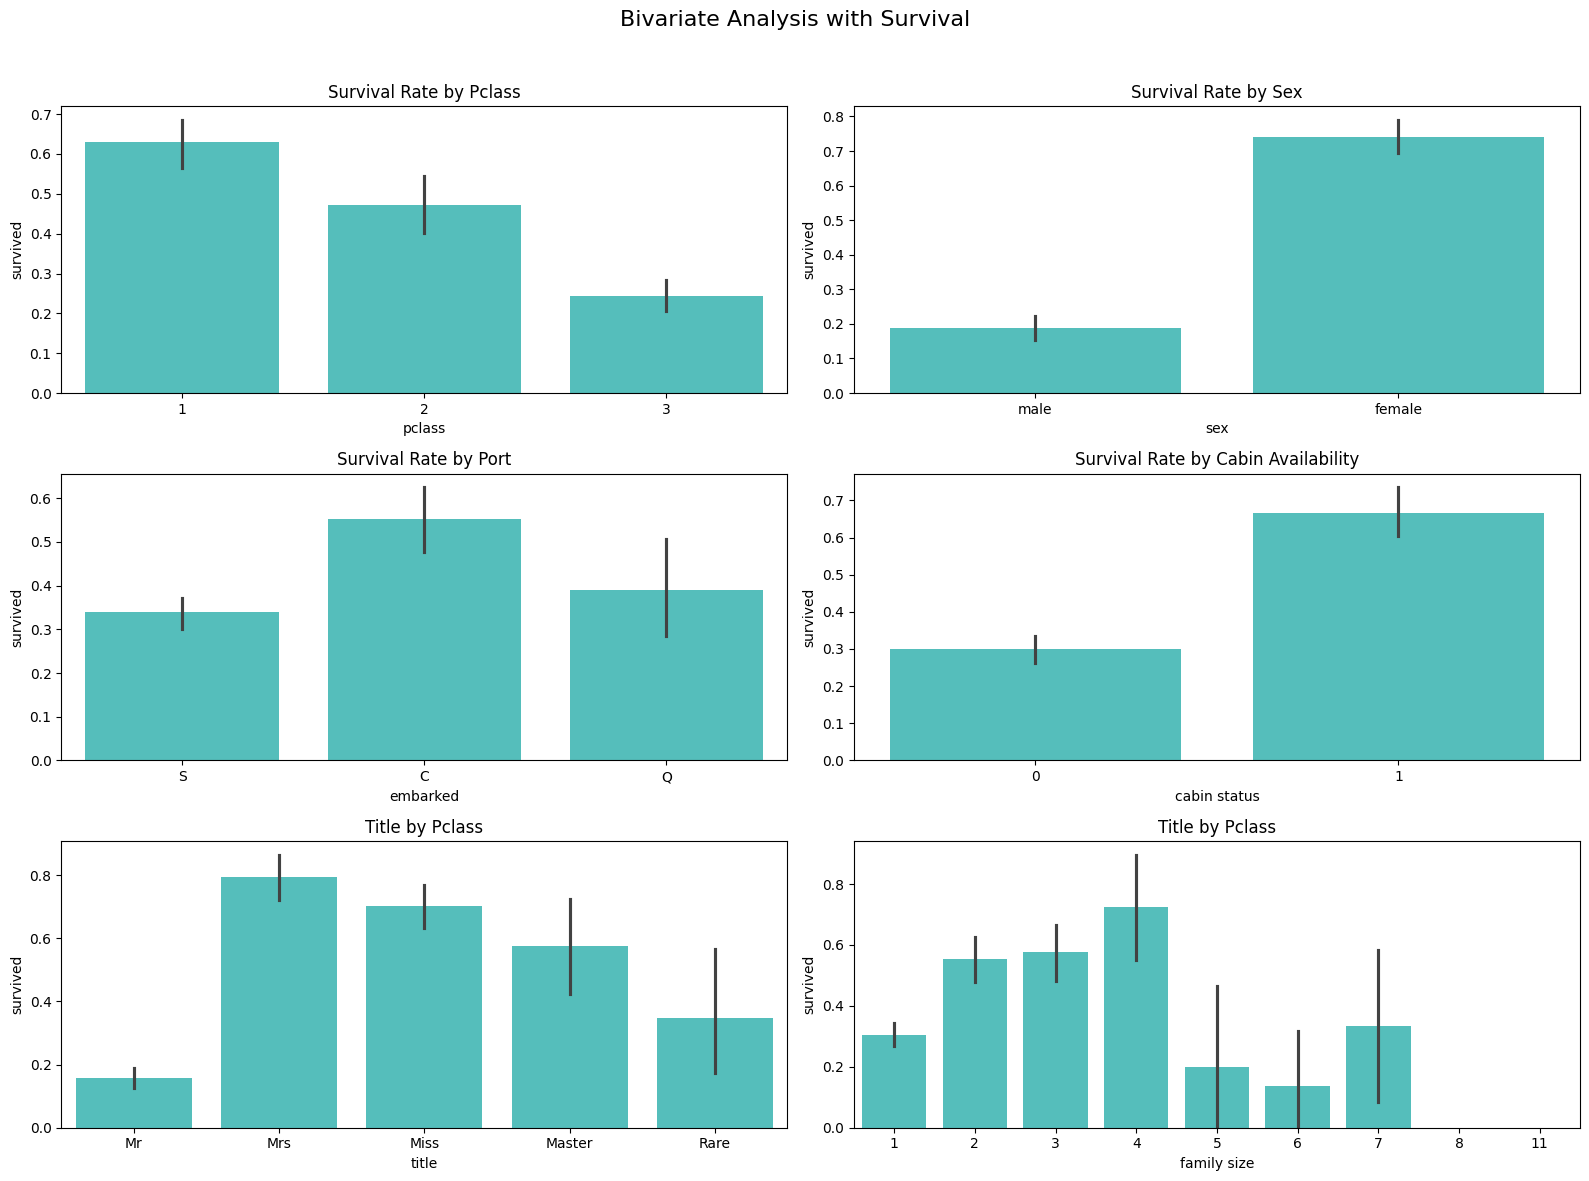

In [132]:
print("Bivariate Analysis: Categorical Feature vs. Categorical Feature / Survival")

colorcode = '#44CFCB'
#barplot does not support stat (for percent) alike countplot

fig, axes = plt.subplots(3, 2, figsize=(16, 12))
fig.suptitle('Bivariate Analysis with Survival', fontsize=16)

# Pclass vs. Survived
sns.barplot(ax=axes[0, 0], x='pclass', y='survived', color = colorcode, data=df).set_title('Survival Rate by Pclass')

# Sex vs. Survived
sns.barplot(ax=axes[0, 1], x='sex', y='survived', color = colorcode, data=df).set_title('Survival Rate by Sex')

# Embarked vs. Survived
sns.barplot(ax=axes[1, 0], x='embarked', y='survived', color = colorcode, data=df).set_title('Survival Rate by Port')

# Cabin status vs. Survived
sns.barplot(ax=axes[1, 1], x='cabin status', y='survived', color = colorcode, data=df).set_title('Survival Rate by Cabin Availability')

# Title vs. Survived
sns.barplot(ax=axes[2, 0], x='title', y='survived', color = colorcode, data=df).set_title('Survival by title')

# family size vs. Survived
sns.barplot(ax=axes[2, 1], x='family size', y='survived', color = colorcode, data=df).set_title('Survival by family size')


plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

In [83]:
df['pclass'][df['cabin status'] == 0].unique()

array([3, 2, 1])

In [84]:
df['pclass'][df['cabin status'] == 1].unique()

array([1, 3, 2])

In [85]:
# when cabin is not allocated, the person can be from any class. Similarly, when cabin is allocated too.
# so we cannot create a vein diagram having 1st class in outer circle and allocated cabin inside it. or other way round

Key Insights:

Pclass: 1st class passengers had a greater than 60% survival rate, while 3rd class passengers had less than a fourth.

Sex: Females had a survival rate of approximatley 75%, while males had a rate below a fifth.

Title: 'Mrs' and 'Miss' (females) had high survival rates. 'Mr' (males) had a very low survival rate. 'Master' (young boys) had a significantly higher survival rate than 'Mr.  The 'Rare' titles also had a mixed but generally higher survival rate than common men.

Embarked: Passengers embarking from Cherbourg ('C') had a higher survival rate than those from the other ports.

Cabin status: Passengers with a registered cabin number had a much higher survival rate.

Bivariate Analysis: Numerical Feature vs. Categorical Feature / Survival


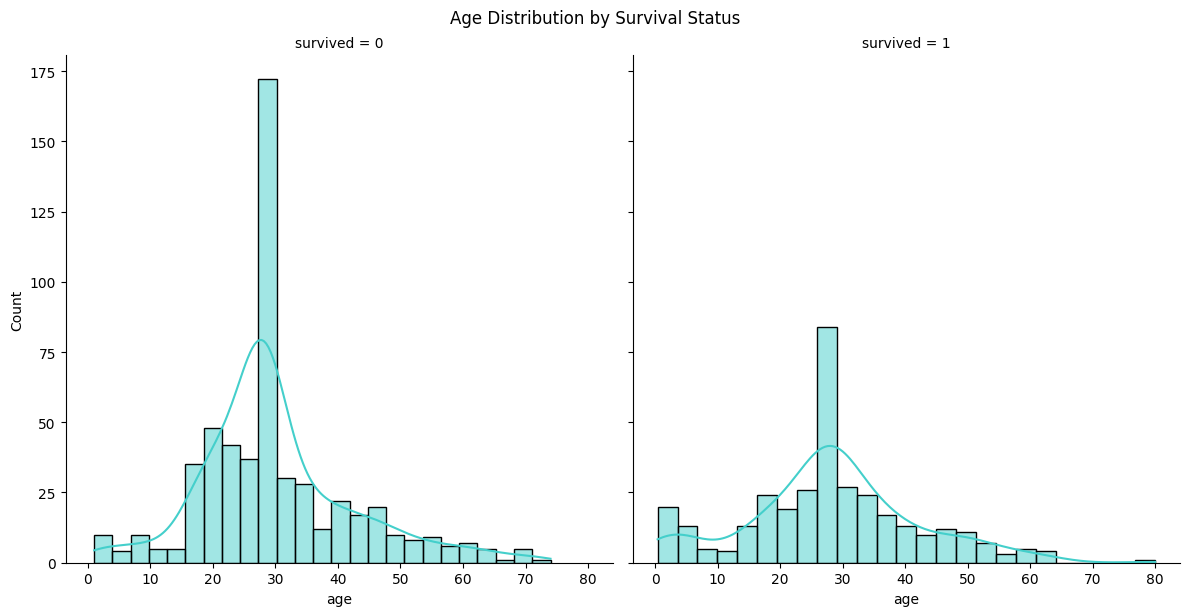

In [129]:
print("Bivariate Analysis: Numerical Feature vs. Categorical Feature / Survival")

colorcode = '#44CFCB'

# age and fare
#fig, axes = plt.subplots(1, 2, figsize=(16, 12))
#fig.suptitle('Bivariate Analysis with Survival', fontsize=16)

# age vs. Survived
#sns.histplot(ax=axes[0], x='age', y = 'survived', color = colorcode, data=df, bins = 30).set_title('Survival Rate by age')

#Hue = split the chart by colours for each group. but keep them on same axis”
#facetgrid = split the chart's category separately to see shapes clearly

agechart = sns.FacetGrid(df, col='survived', height=6)
agechart.map(sns.histplot, 'age', bins=25, kde=True, color = colorcode)
plt.suptitle('Age Distribution by Survival Status', y=1.02)
plt.show()

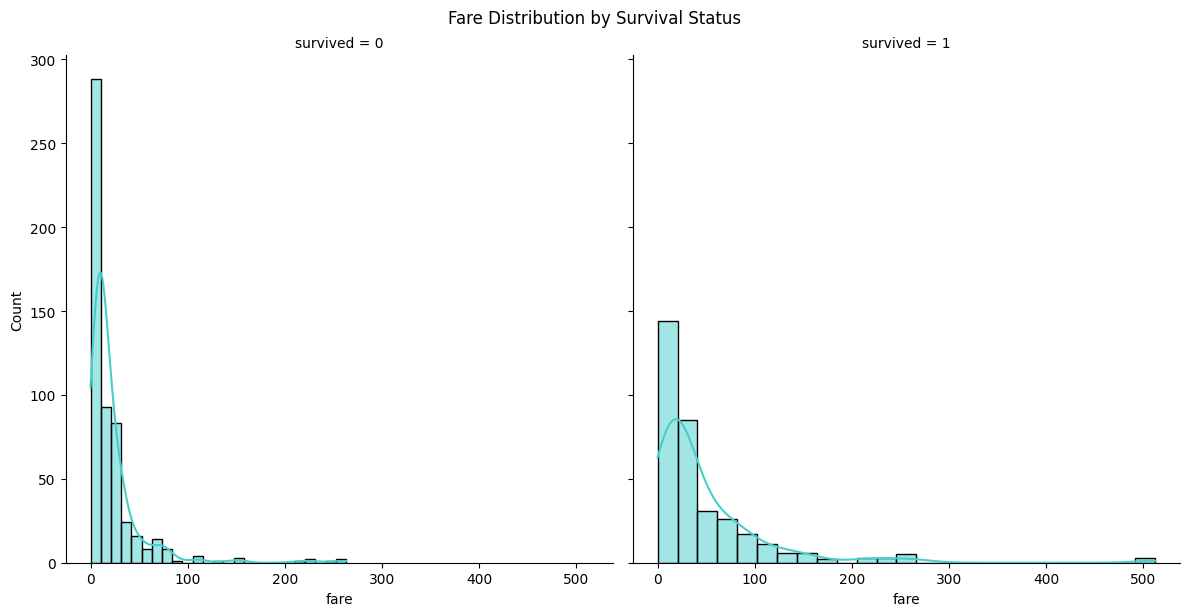

In [131]:
farechart = sns.FacetGrid(df, col='survived', height=6)
farechart.map(sns.histplot, 'fare', bins=25, kde=True, color = colorcode)
plt.suptitle('Fare Distribution by Survival Status', y=1.02)
plt.show()

# Step 8. Multivariate Analysis

Now we explore interactions between multiple variables simultaneously, including our new engineered features.

Text(0.5, 1.0, 'Survival Rate by Pclass and Sex')

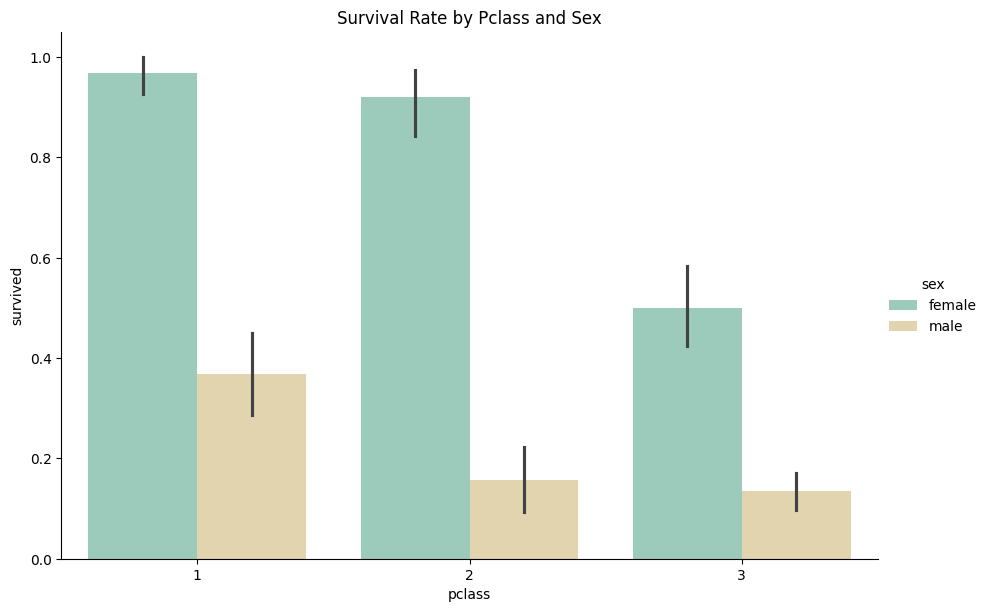

In [145]:
sns.catplot(x='pclass', y='survived', hue='sex', data=df, kind='bar', height=6, aspect=1.5, palette=['#94d2bd', '#e9d8a6'] )
plt.title('Survival Rate by Pclass and Sex')

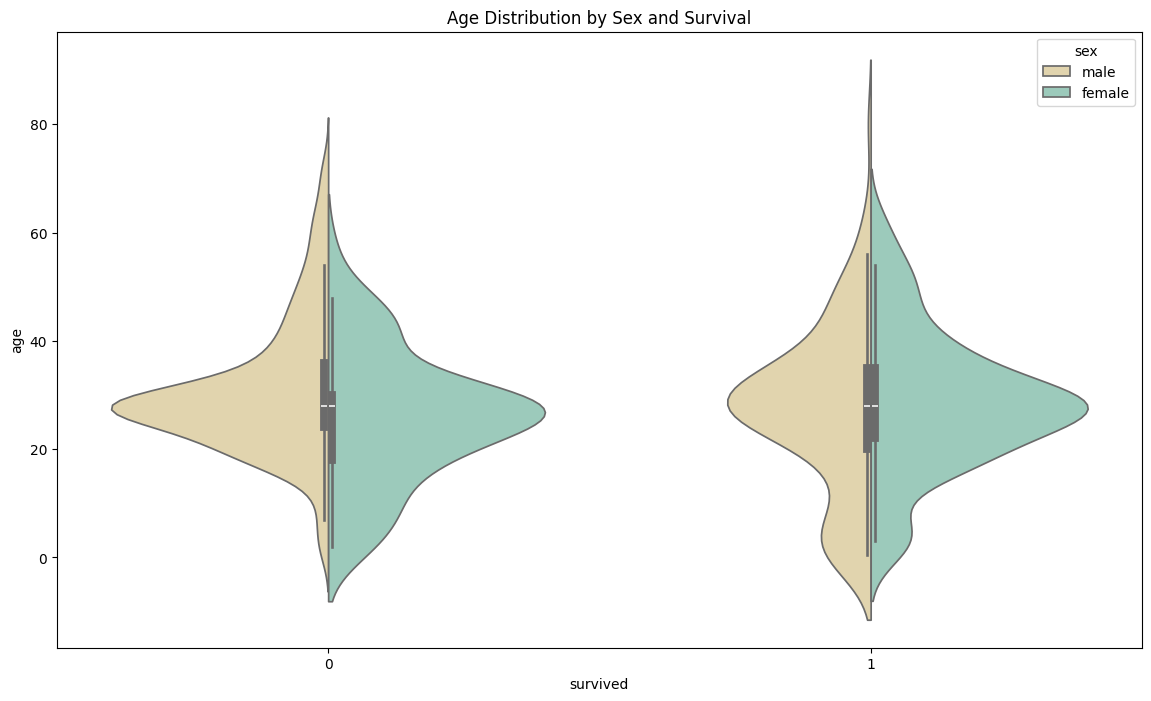

In [146]:
plt.figure(figsize=(14, 8))
sns.violinplot(x='survived', y='age', hue='sex', data=df, split=True, palette={'female': '#94d2bd', 'male': '#e9d8a6'})
plt.title('Age Distribution by Sex and Survival')
plt.show()

female survived more as compared to number of males
even the elderly aged woman appears to have better probability of being survived, as compared to men.

but given the umber of male, female and male deceased seems close

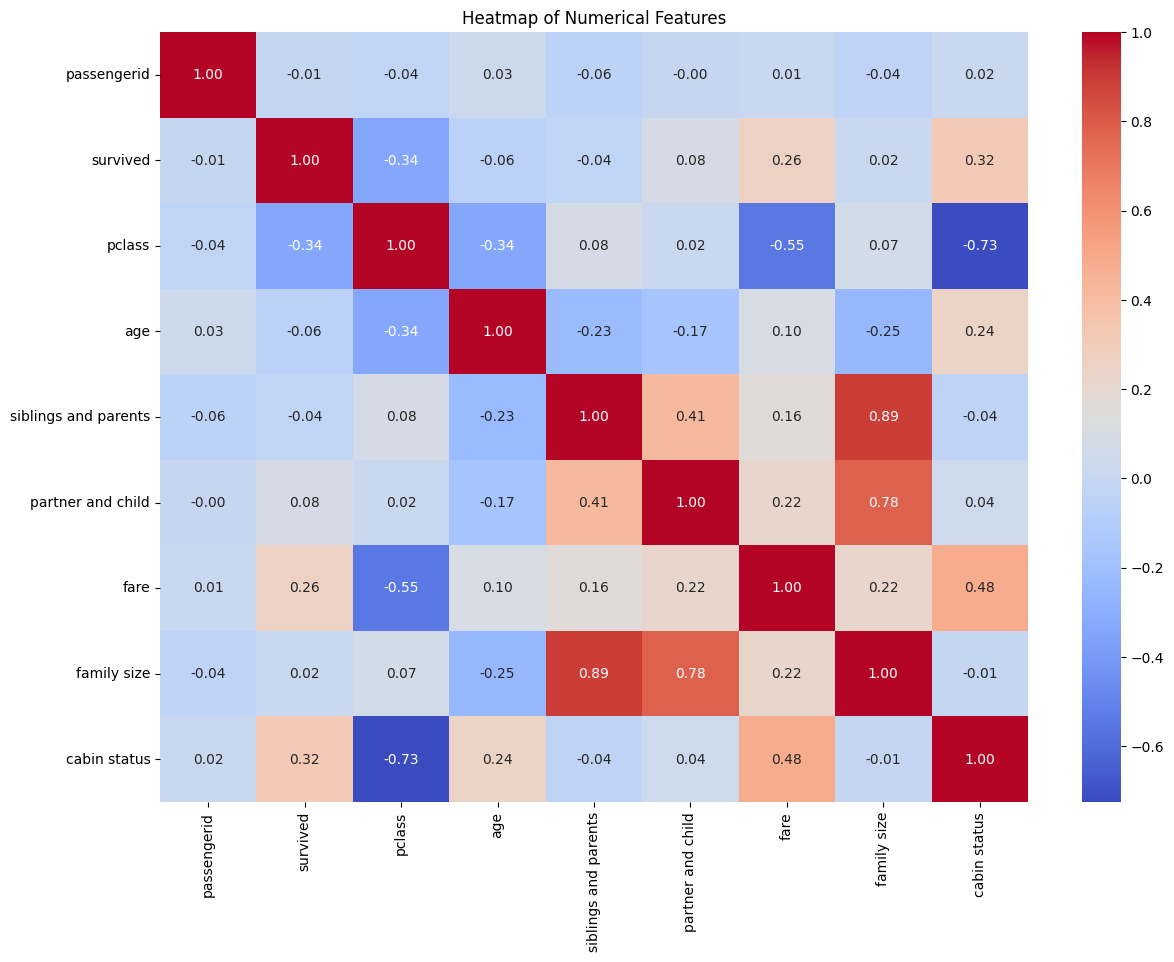

In [149]:
plt.figure(figsize=(14, 10))
numeric_cols = df.select_dtypes(include= 'number')
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Features')
plt.show()

# Data Profiling

YData Profiling (formerly know as pandas profiling) is one of the most popular way of data profiling

Streamlines EDA, provides comprehensive insights, enhances data quality, and promotes data science best practices.

It answers the following questions:
- Do I have missing data? How does my missing data behave?

- Are all instances labelled? Are they trustful?

- Are these features consistent and informative?

- Do I have enough data to train my model?

- Are concepts equally represented in data?

- Is my data noisy?

These questions are crucial for getting high quality data as input for machine learning models

It tells us if data is “good to go” for model building, or if there is something that needs to be handled properly first.

In [141]:
!pip install ydata_profiling
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 14/14 [00:00<00:00, 55.76it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [142]:
profile.to_file("sample.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**Key Interpreation:**


1. The profile shows that there is no column with missing data, or duplicate rows
2. Title & Gender: Women (‘Miss’, ‘Mrs’) and young boys (‘Master’) had notably higher survival rates, while adult men (‘Mr’) had the lowest. This feature captures social status and age.
3. Passenger Class: Survival chances were strongly linked to class, with 1st-class passengers surviving more often than those in 2nd or 3rd class.
4. Age: Younger passengers, especially children, were more likely to survive than adults.
5. Family Size: Moderate family groups (2–4 people) had better odds of survival. Travelling alone or in very large families reduced the likelihood of surviving.
6. Fare and Cabin: Higher fares and having an assigned cabin were associated with increased survival, reflecting socioeconomic advantage.
7. Embarkation Port: Passengers boarding at Cherbourg (‘C’) tended to survive more frequently.